In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


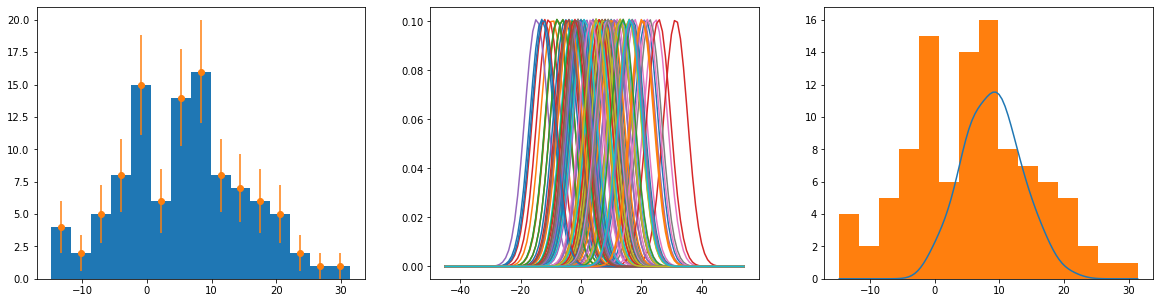

In [3]:
#Exercise 1

N, sigma, mean = 100, 10, 5
gaus = []
x = np.array([sigma*np.random.randn() + mean for i in range(N)])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

n_bin = int((x.max()-x.min())/3)
ax1.hist(x, bins= n_bin, label='counts')

counts, bin_edges = np.histogram(x, n_bin)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
err = counts**(1/2)
ax1.errorbar(bin_centres, counts, yerr=err, fmt='o')

x_values = np.arange(mean-5*sigma, mean+5*sigma, 1)
std = 1.06*x.std()*x.size**(-1/5)
for i in range(len(x)):
    mu = x[i]
    y_values = stats.norm(mu,std)
    ax2.plot(x_values, y_values.pdf(x_values))
    gaus.append(y_values.pdf(x_values))

gaus = np.array(gaus)
gaus = np.sum(gaus, axis=0)
norm = integrate.trapz(gaus)
norm_hist = integrate.trapz(counts,bin_centres)
ax3.plot(np.linspace(x.min(),x.max(),N), gaus/norm*norm_hist)
ax3.hist(x, bins=n_bin, label='counts');





2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

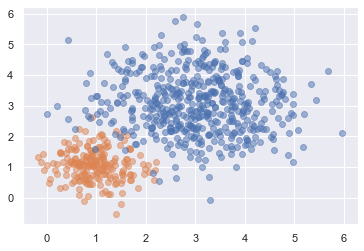

In [52]:
#Exercise 2

N1, N2 = 200, 500
mu_1, mu_2 = 1, 3
std_1, std_2 = 0.5, 1
category_1 = np.array([[std_1*np.random.randn() + mu_1 for i in range(N1)],\
                       [std_1*np.random.randn() + mu_1 for i in range(N1)]])
category_2 = np.array([[std_2*np.random.randn() + mu_2 for i in range(N2)],\
                       [std_2*np.random.randn() + mu_2 for i in range(N2)]])

plt.scatter(category_1[0][:], category_1[1][:], c='C1', alpha=0.5)
plt.scatter(category_2[0][:], category_2[1][:], c='C0', alpha=0.5);



In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

LinregressResult(slope=0.5779133666359261, intercept=10.025258299436526, rvalue=0.043403510522559044, pvalue=8.71703718357661e-06, stderr=0.12989809632256566, intercept_stderr=0.05919737176060831)


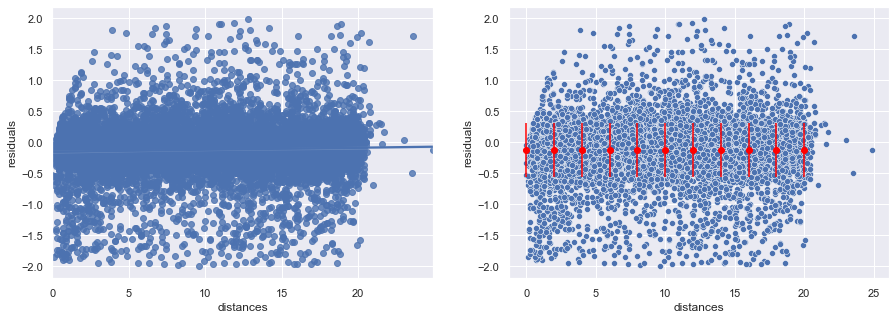

In [53]:
#Exercise 3

data = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
data = data[abs(data['residuals']) < 2]
print(stats.linregress(data['residuals'], data['distances']))

x = np.arange(0,21,2)
count, bin_edges = np.histogram(data['distances'], len(x))
y = np.array([data[data['residuals'] < val]['residuals'].mean() for val in bin_edges[1:]])
erry = np.array([data[data['residuals'] < val]['residuals'].std() for val in bin_edges[1:]])
data_1 = pd.DataFrame(np.array([x,y,erry]).T,columns=('distances','residuals','erry'))

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x="distances", y="residuals", data=data, ax=ax[0])
sns.scatterplot(x="distances", y="residuals", data=data, ax=ax[1])
ax[1].errorbar(x, y, yerr=erry, fmt=' ', ecolor='red')
ax[1].scatter(x, y, c='red');

